In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import pandas as pd
import healpy as hp

In [6]:
print np.linspace(0,360,6)

[  0.  72. 144. 216. 288. 360.]


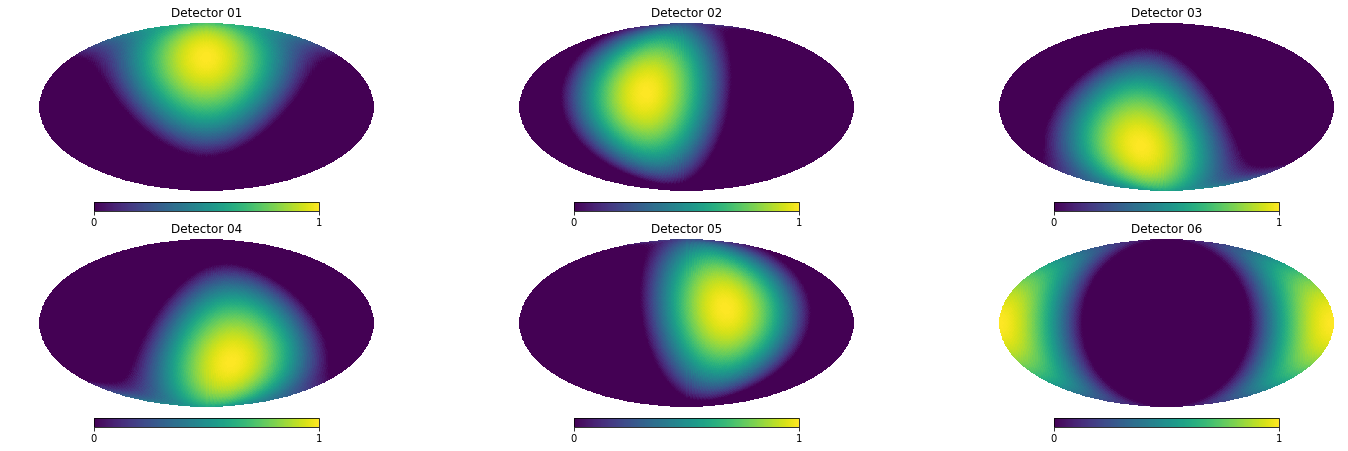

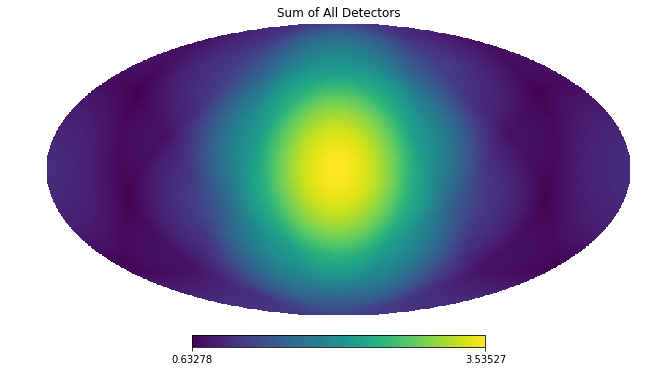

In [47]:
## setup Nimble
pointings = {'01': ('0:0:0','45:0:0'),
           '02': ('72:0:0','45:0:0'),
           '03': ('144:0:0','45:0:0'),
           '04': ('216:0:0','45:0:0'),
           '05': ('288:0:0','45:0:0'),
            '06': ('0:0:0','180:0:0')}

npointings=len(pointings)
burstcube = Spacecraft(pointings,lat='00:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in burstcube.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(exposures[i]/max(exposures[i]), max=1,title='Detector '+pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=exposures.sum(axis=0)
fs=exps#/max(exps)#(exps-min(exps))/max(exps)
hp.mollview(fs,title='Sum of All Detectors')